# Brief Description of My Dataset

**World Happiness Report**

The World Happiness Report includes the state of happiness in different parts of the World. It ranks 155 countries by their happiness levels which depends on factors like economic production, social support, life expectancy etc.

The happiness scores and rankings use data from the Gallup World Poll, which is based on answers to the main life evaluation question asked in the poll.  The dataset I used contains the values from the year 2015

The dataset consists of 12 columns, 158 rows and 158 unique values

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('bmh')

world_happiness = pd.read_csv('2015.csv') # Read the 2015.csv file into a pandas dataframe
world_happiness.head() # First 5 rows

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [34]:
world_happiness.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

The columns 'Country' and 'Region' show where the survey was conducted and 'Happiness Rank' is the rank of the country among the others based on the 'Happiness Score'. Happiness Score was measured in 2015 by asking  the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."

The columns following the happiness score estimate the extent to which each of six factors - economic production, social support, life expectancy, freedom, absence of corruption and generosity - contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world's lowest national averages for each six factors

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average 2014-2016 life evaluations. Although some life evaluation residuals are quite large, occasionally exceeding one point on the scale from 0 to 10, they are always much smaller than the calculated value in Dystopia, where the average life is rated at 1.85 on the 0 to 10 scale.

The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country

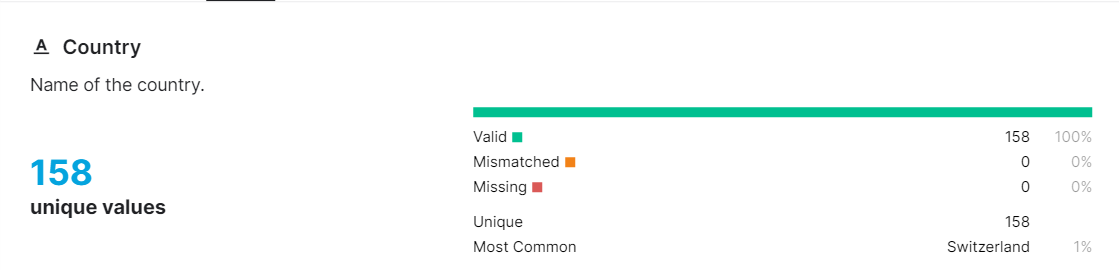

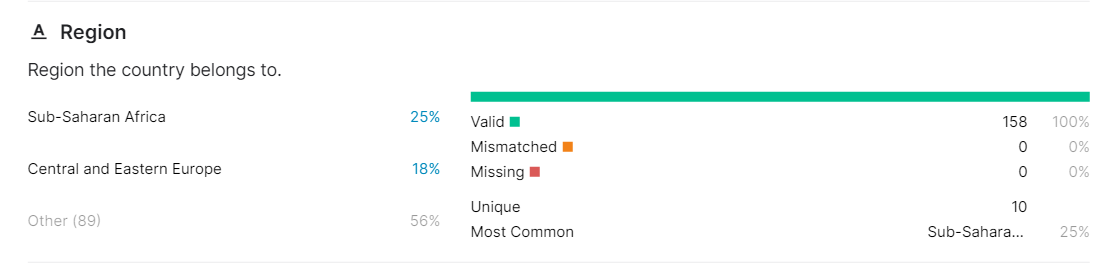

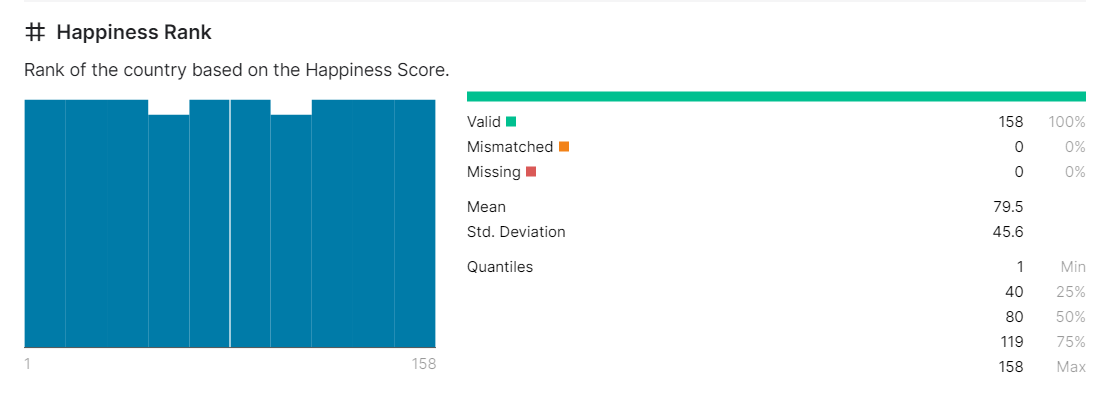

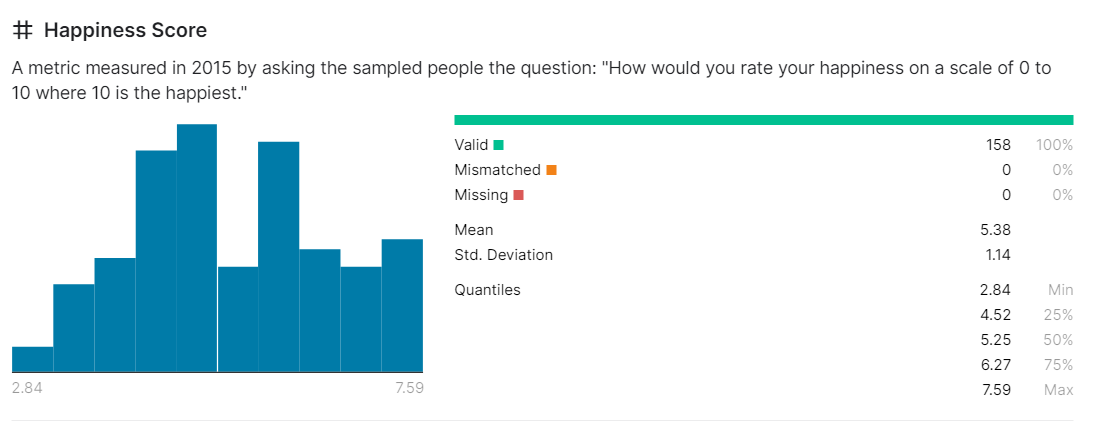

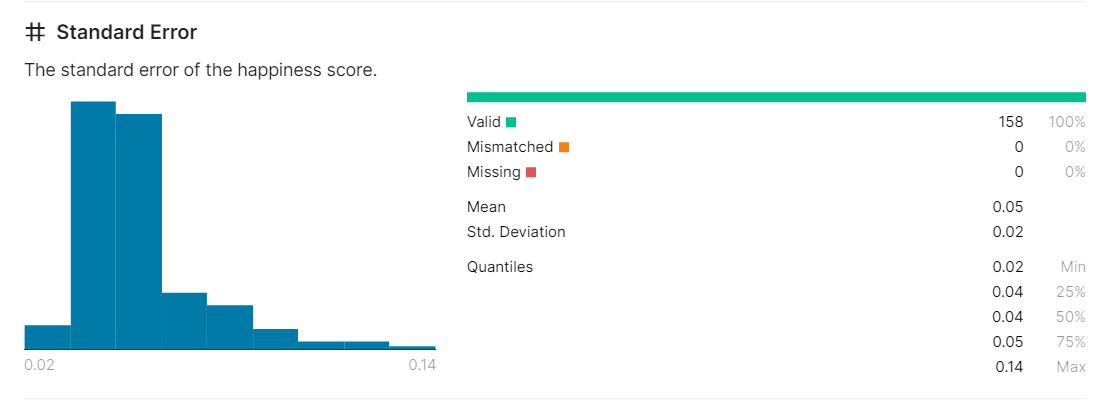

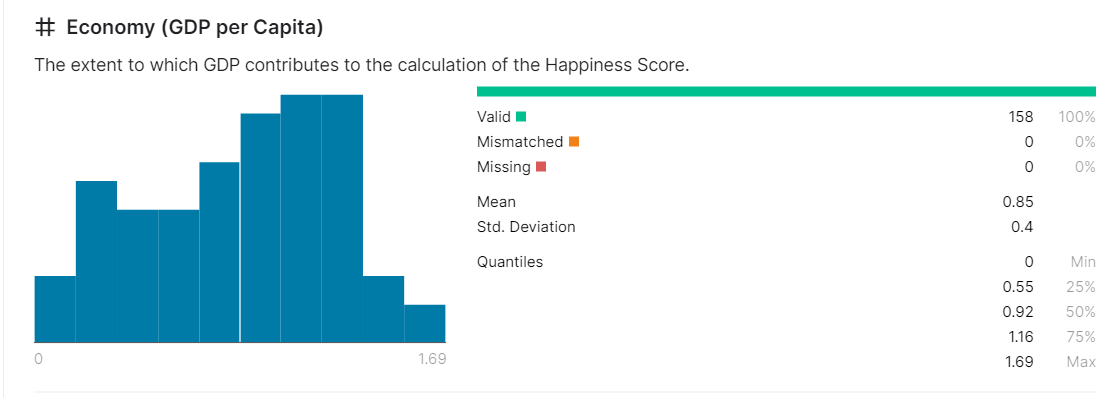

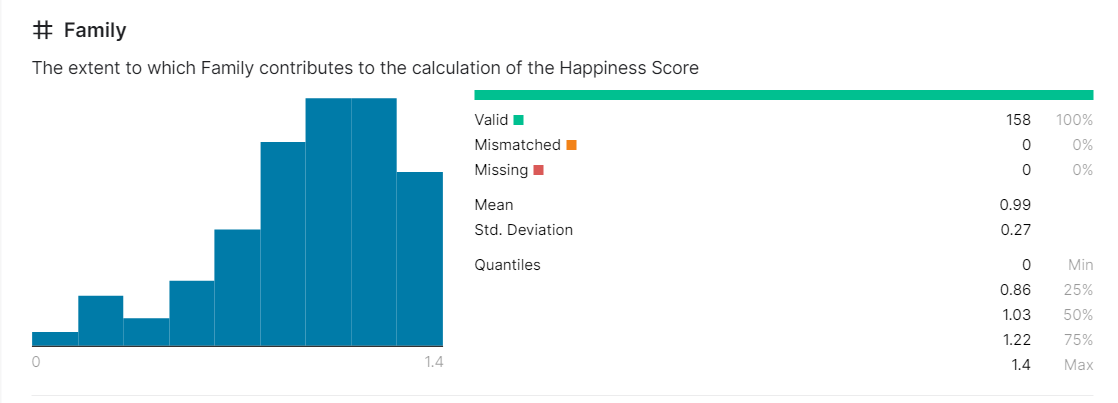

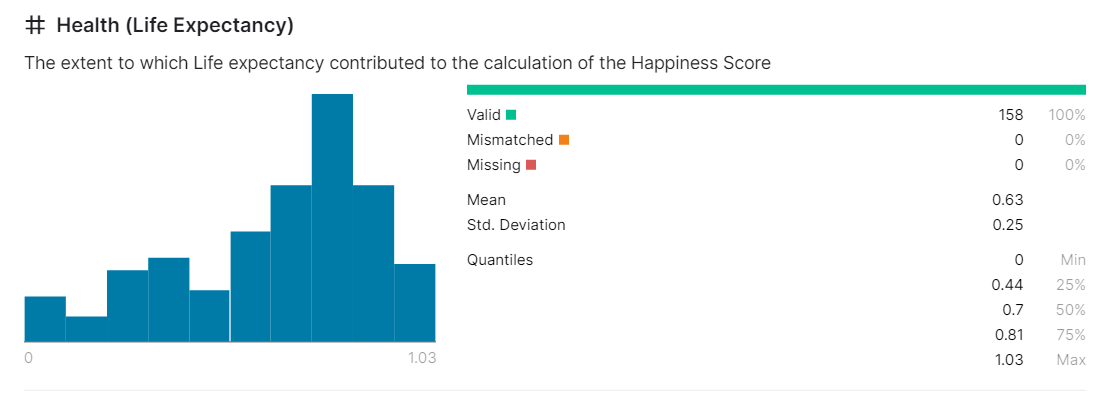

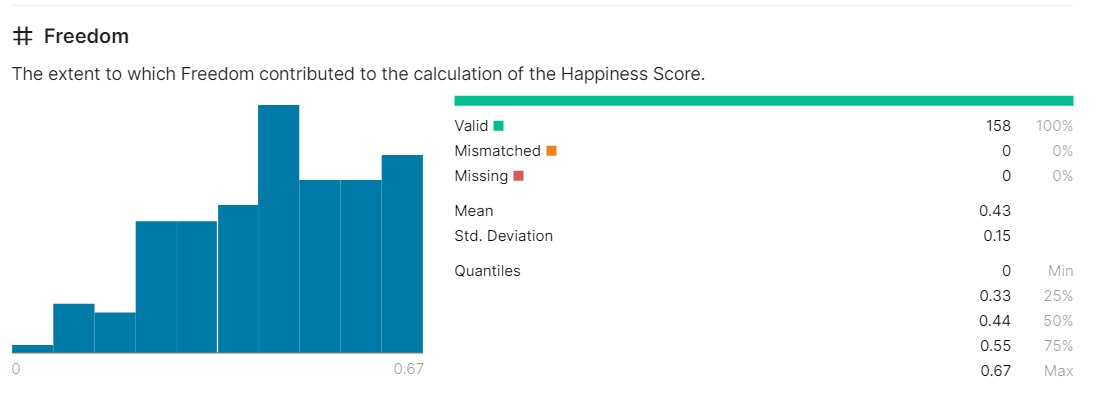

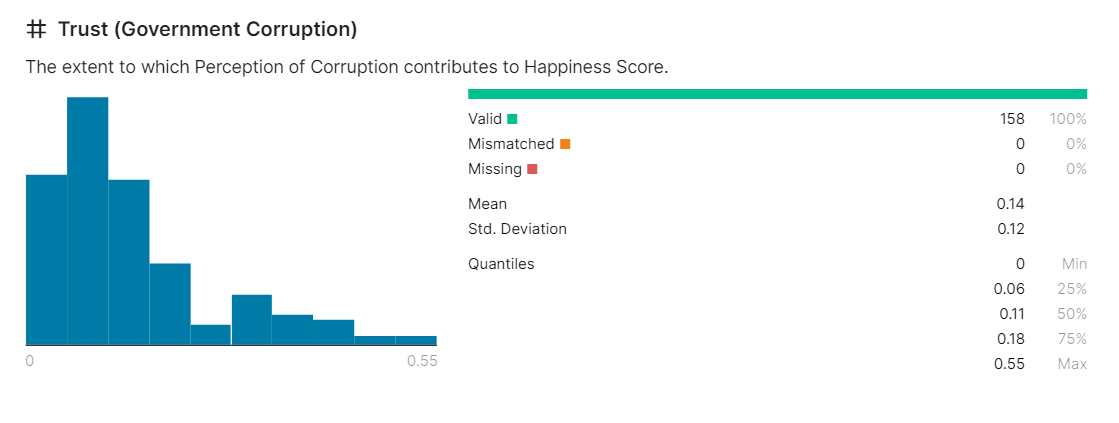

# Initial Plan for Data Exploration

This analysis is the first step to build a model to predict happiness score based on the other factors.

1. Data Insight
2. Data Cleaning and Feature Engineering
3. Analyzing relationships between variables
4. Conclusion

**1. Data Insight**

In [35]:
world_happiness.nunique(axis=0)

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

In [36]:
world_happiness.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


**2. Cleaning the Dataset and Feature Engineering**

In [37]:
world_happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

I removed 'Happiness Rank' column since it doesn't affect the target.

There isn't any missing values so we don't need to remove other features.

Nevertheless, I used .dropna(axis=0) to remove any rows with null values in case I missed them.

In [38]:
df_cleaned = world_happiness.dropna(axis=0)

In [39]:
del df_cleaned['Happiness Rank']

In [40]:
df_cleaned.shape

(158, 11)

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


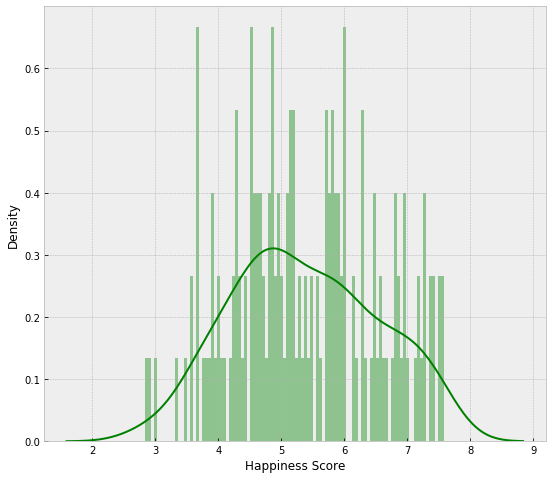

In [41]:
plt.figure(figsize=(9, 8))
sns.distplot(df_cleaned['Happiness Score'], color='g', bins=100, hist_kws={'alpha': 0.4});

The happiness score is a little far from normal distrubition and there are some outliers
Lets apply square root transformation to make it more normally distributed

In [42]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from scipy.stats import boxcox

In [43]:
normaltest(df_cleaned['Happiness Score'].values)

NormaltestResult(statistic=10.166540875747726, pvalue=0.006199600417031703)

(array([ 3.,  4., 14., 14., 27., 23., 23., 16., 19., 15.]),
 array([1.68493323, 1.791885  , 1.89883678, 2.00578855, 2.11274032,
        2.21969209, 2.32664386, 2.43359563, 2.5405474 , 2.64749917,
        2.75445094]),
 <a list of 10 Patch objects>)

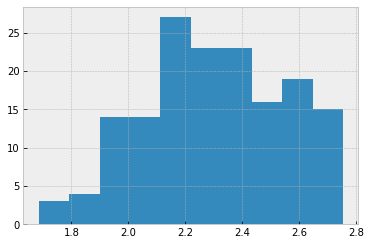

In [44]:
sqrt_happiness_score = np.sqrt(df_cleaned['Happiness Score'])
plt.hist(sqrt_happiness_score)

In [45]:
normaltest(sqrt_happiness_score.values)

NormaltestResult(statistic=6.025754587304784, pvalue=0.049150055968934236)

pvalue is almost 0.05 so we can reject null hypothesis and say that the target column is nearly normally distributed

In [48]:
# Exchange the columns
df_cleaned['Happiness Score'] = sqrt_happiness_score


Now, lets look at the distribution of all of the features by ploting them.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7be2b5f190>,
      dtype=object)

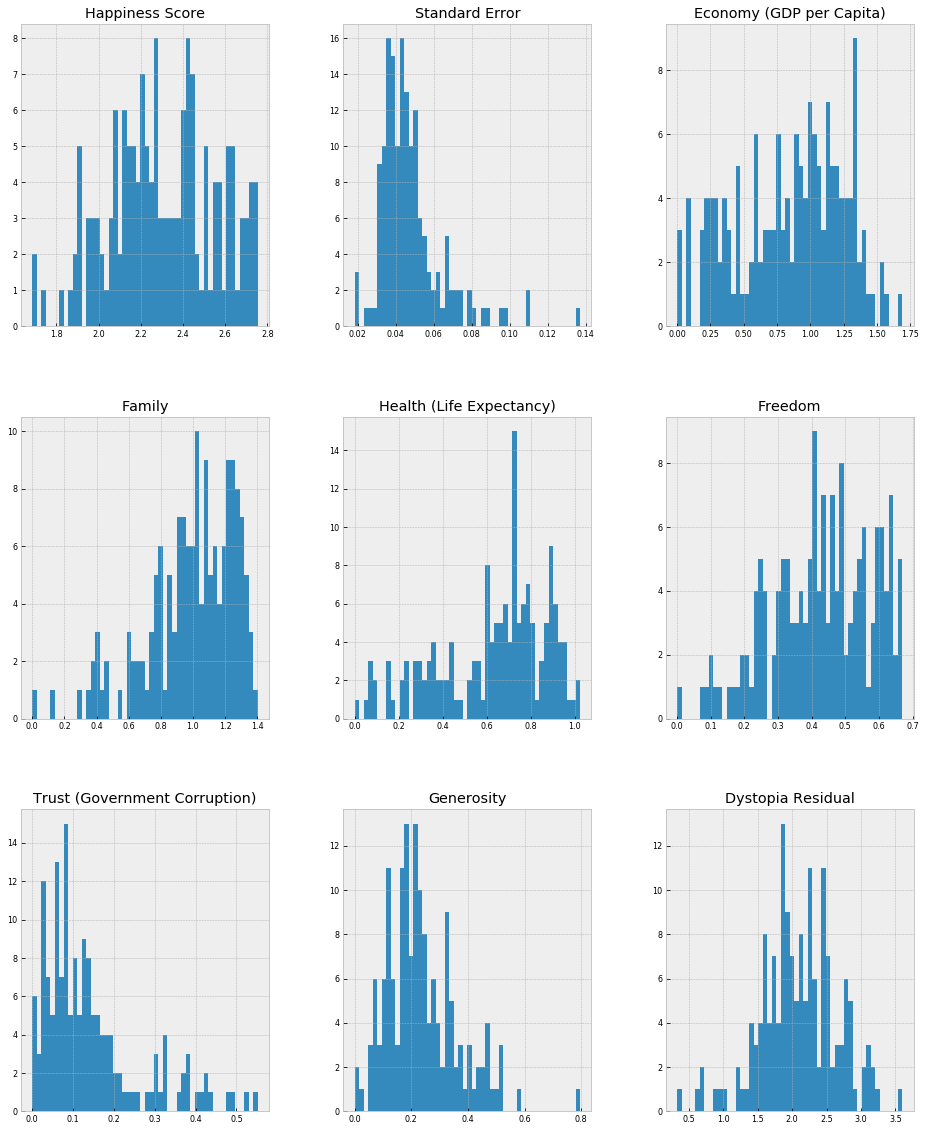

In [49]:
df_cleaned.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

Now, I will try to find features that are correlated with the target 'Happines Score'. I will save those features in a variable called corr_target.

We have 5 values which are strongly correlated with happiness score. Now we must find the features with very few or explainable outliers. Then we can remove the outliers from these features and see which one can have a good correlation without their outliers.

In [50]:
df_num_corr = df_cleaned.corr()['Happiness Score'][:] 
corr_target = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(corr_target), corr_target))

There is 6 strongly correlated values with SalePrice:
Happiness Score             1.000000
Economy (GDP per Capita)    0.782452
Family                      0.748326
Health (Life Expectancy)    0.725665
Freedom                     0.555736
Dystopia Residual           0.532877
Name: Happiness Score, dtype: float64


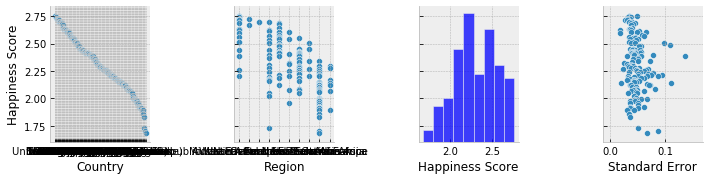

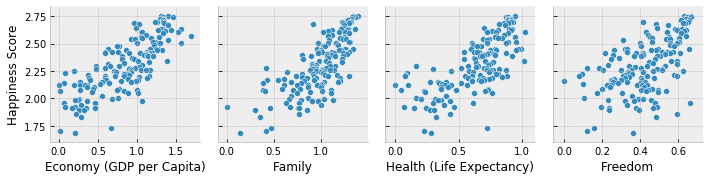

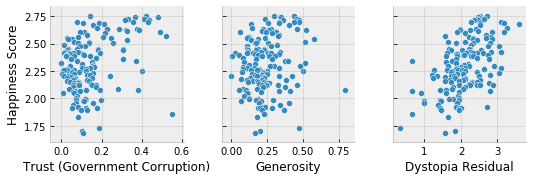

In [51]:
for i in range(0, len(df_cleaned.columns), 4):
    sns.pairplot(data=df_cleaned,
                x_vars=df_cleaned.columns[i:i+4],
                y_vars=['Happiness Score'])

No we can see some relationships. Most of the features have a linear relationship with the 'Happiness Score'. Some of the data points are located on x=0 which might mean the absence of such feature in score.



**Log Transformation for Skewed Variables**

In [52]:
def hist_loop(data: pd.DataFrame,
              rows: int,
              cols: int,
              figsize: tuple):
    fig, axes = plt.subplots(rows,cols, figsize=figsize)
    for i, ax in enumerate(axes.flatten()):
        if i < len(data.columns):
            data[sorted(data.columns)[i]].plot.hist(bins=30, ax=ax)
            ax.set_title(f'{sorted(data.columns)[i]} distribution', fontsize=10)
            ax.tick_params(axis='x', labelsize=10)
            ax.tick_params(axis='y', labelsize=10)
            ax.get_yaxis().get_label().set_visible(False)
        else:
            fig.delaxes(ax=ax)
    fig.tight_layout()

In [53]:
# Create a function to check skewness
def skew_df(data: pd.DataFrame, skew_limit: float) -> pd.DataFrame:
    # Define a limit above which we will log transform
    skew_vals = data.skew()

    # Showing the skewed columns
    skew_cols = (skew_vals
                 .sort_values(ascending=False)
                 .to_frame('Skew')
                 .query('abs(Skew) > {}'.format(skew_limit))
    )
    return skew_cols

In [54]:
# Print out skewed columns
skew_cols = skew_df(df_cleaned, 0.75)
skew_cols

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


,Skew
Standard Error,1.983439
Trust (Government Corruption),1.385463
Generosity,1.001961
Family,-1.006893


In [55]:
# Perform log transformation
for col in skew_cols.index.values:
    df_cleaned['log_' + col] = df_cleaned[col].apply(np.log1p)

In [56]:
# Check skewness on log transformed data
log_df = df_cleaned.filter(regex='^log_', axis=1)
skew_log_cols = skew_df(log_df, 0.75)
skew_log_cols

,Skew
log_Standard Error,1.890608
log_Trust (Government Corruption),1.180922
log_Family,-1.517141


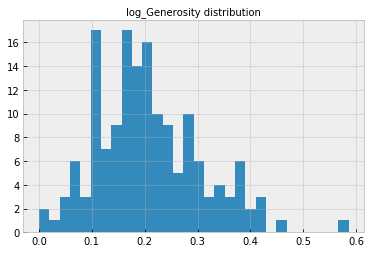

In [57]:
# Plot log columns that have nearly normal distribution
log_df = log_df.drop(skew_log_cols.index, axis=1)
hist_loop(data=log_df.copy(),
          rows=3,
          cols=4,
          figsize=(20,10))

In [58]:
# Join these new columns to our dataset
df_cleaned = df_cleaned.merge(log_df)

# Next Step in Analyzing this data
- Apply coxbox our square root transformation to the features with non normally distribution
- Apply mutual information regression for future selection
- Apply Backward Stepwise Regression
- Build a pipeline to preprocess data and run the model on the test set

# Conclusion

Linear regression might be a good fit to this data set, since most of the features has linear relationships. Nevertheless, one can collect more data to form a better data set

There need to be more analyses before jumping to a conclusion.